In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_moons

from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
plt.style.use('seaborn')

## Generate Data

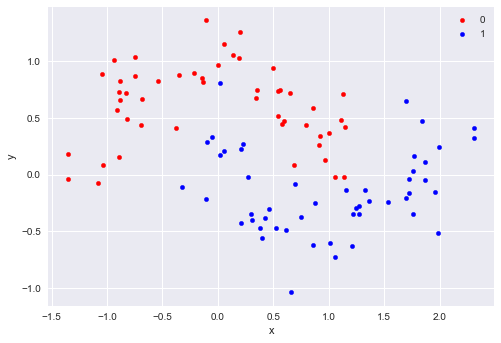

In [ ]:
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)

# scatter plot, dots colored by class value
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')

for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])

# show plot
plt.show()

In [ ]:
# split into train and test
n_train = 30
trainX, validX = X[:n_train, :], X[n_train:, :]
trainy, validy = y[:n_train], y[n_train:]

## Create Simple MLP Model

In [ ]:
def init_model():

    # define model
    model = Sequential()
    model.add(Dense(500, input_dim=2, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

## Train Model

In [ ]:
# init model
model = init_model()

In [ ]:
# fit model
history = model.fit(trainX, trainy, validation_data=(validX, validy), epochs=500, verbose=0)

In [ ]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, valid_acc = model.evaluate(validX, validy, verbose=0)
print('Train: %.3f, Valid: %.3f' % (train_acc, valid_acc))

Train: 0.967, Valid: 0.843


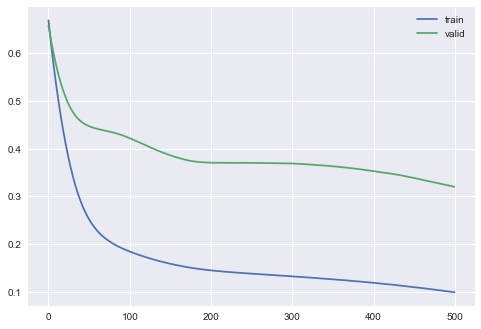

In [ ]:
# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='valid')
plt.legend()
plt.show()

## Train Model (More Epoch)

In [ ]:
# init model
model = init_model()

In [ ]:
# fit model
history = model.fit(trainX, trainy, validation_data=(validX, validy), epochs=4000, verbose=0)

In [ ]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, valid_acc = model.evaluate(validX, validy, verbose=0)
print('Train: %.3f, Valid: %.3f' % (train_acc, valid_acc))

Train: 1.000, Valid: 0.914


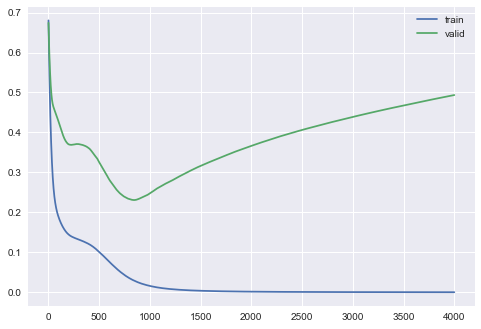

In [ ]:
# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='valid')
plt.legend()
plt.show()

## Train Model (Overfit with Early Stopping)

In [ ]:
# init model
model = init_model()

In [ ]:
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [ ]:
# fit model
history = model.fit(trainX, trainy, validation_data=(validX, validy), epochs=4000, verbose=0, callbacks=[es])

Epoch 00230: early stopping


In [ ]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, valid_acc = model.evaluate(validX, validy, verbose=0)
print('Train: %.3f, Valid: %.3f' % (train_acc, valid_acc))

Train: 0.967, Valid: 0.814


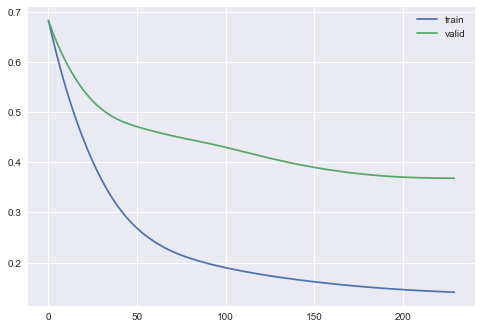

In [ ]:
# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='valid')
plt.legend()
plt.show()

## Train Model (Overfit with Early Stopping, Patience)

In [ ]:
# init model
model = init_model()

In [ ]:
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)

In [ ]:
# fit model
history = model.fit(trainX, trainy, validation_data=(validX, validy), epochs=4000, verbose=0, callbacks=[es])

Epoch 01031: early stopping


In [ ]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, valid_acc = model.evaluate(validX, validy, verbose=0)
print('Train: %.3f, Valid: %.3f' % (train_acc, valid_acc))

Train: 1.000, Valid: 0.943


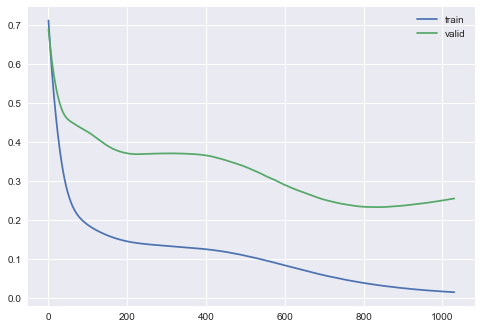

In [ ]:
# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='valid')
plt.legend()
plt.show()

## Train Model (Overfit with Early Stopping, Patience, Model Checkpoint)

In [ ]:
# init model
model = init_model()

In [ ]:
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)

In [ ]:
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [ ]:
# fit model
history = model.fit(trainX, trainy, validation_data=(validX, validy), epochs=4000, verbose=0, callbacks=[es, mc])


Epoch 00001: val_accuracy improved from -inf to 0.47143, saving model to best_model.h5

Epoch 00002: val_accuracy did not improve from 0.47143

Epoch 00003: val_accuracy improved from 0.47143 to 0.60000, saving model to best_model.h5

Epoch 00004: val_accuracy improved from 0.60000 to 0.71429, saving model to best_model.h5

Epoch 00005: val_accuracy did not improve from 0.71429

Epoch 00006: val_accuracy did not improve from 0.71429

Epoch 00007: val_accuracy did not improve from 0.71429

Epoch 00008: val_accuracy did not improve from 0.71429

Epoch 00009: val_accuracy did not improve from 0.71429

Epoch 00010: val_accuracy did not improve from 0.71429

Epoch 00011: val_accuracy did not improve from 0.71429

Epoch 00012: val_accuracy did not improve from 0.71429

Epoch 00013: val_accuracy did not improve from 0.71429

Epoch 00014: val_accuracy did not improve from 0.71429

Epoch 00015: val_accuracy did not improve from 0.71429

Epoch 00016: val_accuracy did not improve from 0.71429

E


Epoch 00154: val_accuracy did not improve from 0.82857

Epoch 00155: val_accuracy did not improve from 0.82857

Epoch 00156: val_accuracy did not improve from 0.82857

Epoch 00157: val_accuracy did not improve from 0.82857

Epoch 00158: val_accuracy did not improve from 0.82857

Epoch 00159: val_accuracy did not improve from 0.82857

Epoch 00160: val_accuracy did not improve from 0.82857

Epoch 00161: val_accuracy did not improve from 0.82857

Epoch 00162: val_accuracy did not improve from 0.82857

Epoch 00163: val_accuracy did not improve from 0.82857

Epoch 00164: val_accuracy did not improve from 0.82857

Epoch 00165: val_accuracy did not improve from 0.82857

Epoch 00166: val_accuracy did not improve from 0.82857

Epoch 00167: val_accuracy did not improve from 0.82857

Epoch 00168: val_accuracy did not improve from 0.82857

Epoch 00169: val_accuracy did not improve from 0.82857

Epoch 00170: val_accuracy did not improve from 0.82857

Epoch 00171: val_accuracy did not improve from 


Epoch 00308: val_accuracy did not improve from 0.84286

Epoch 00309: val_accuracy did not improve from 0.84286

Epoch 00310: val_accuracy did not improve from 0.84286

Epoch 00311: val_accuracy did not improve from 0.84286

Epoch 00312: val_accuracy did not improve from 0.84286

Epoch 00313: val_accuracy did not improve from 0.84286

Epoch 00314: val_accuracy did not improve from 0.84286

Epoch 00315: val_accuracy did not improve from 0.84286

Epoch 00316: val_accuracy did not improve from 0.84286

Epoch 00317: val_accuracy did not improve from 0.84286

Epoch 00318: val_accuracy did not improve from 0.84286

Epoch 00319: val_accuracy did not improve from 0.84286

Epoch 00320: val_accuracy did not improve from 0.84286

Epoch 00321: val_accuracy did not improve from 0.84286

Epoch 00322: val_accuracy did not improve from 0.84286

Epoch 00323: val_accuracy did not improve from 0.84286

Epoch 00324: val_accuracy did not improve from 0.84286

Epoch 00325: val_accuracy did not improve from 


Epoch 00465: val_accuracy did not improve from 0.84286

Epoch 00466: val_accuracy did not improve from 0.84286

Epoch 00467: val_accuracy did not improve from 0.84286

Epoch 00468: val_accuracy did not improve from 0.84286

Epoch 00469: val_accuracy did not improve from 0.84286

Epoch 00470: val_accuracy did not improve from 0.84286

Epoch 00471: val_accuracy did not improve from 0.84286

Epoch 00472: val_accuracy did not improve from 0.84286

Epoch 00473: val_accuracy did not improve from 0.84286

Epoch 00474: val_accuracy did not improve from 0.84286

Epoch 00475: val_accuracy did not improve from 0.84286

Epoch 00476: val_accuracy did not improve from 0.84286

Epoch 00477: val_accuracy did not improve from 0.84286

Epoch 00478: val_accuracy did not improve from 0.84286

Epoch 00479: val_accuracy did not improve from 0.84286

Epoch 00480: val_accuracy did not improve from 0.84286

Epoch 00481: val_accuracy did not improve from 0.84286

Epoch 00482: val_accuracy did not improve from 


Epoch 00610: val_accuracy did not improve from 0.91429

Epoch 00611: val_accuracy did not improve from 0.91429

Epoch 00612: val_accuracy did not improve from 0.91429

Epoch 00613: val_accuracy improved from 0.91429 to 0.92857, saving model to best_model.h5

Epoch 00614: val_accuracy did not improve from 0.92857

Epoch 00615: val_accuracy did not improve from 0.92857

Epoch 00616: val_accuracy did not improve from 0.92857

Epoch 00617: val_accuracy did not improve from 0.92857

Epoch 00618: val_accuracy did not improve from 0.92857

Epoch 00619: val_accuracy did not improve from 0.92857

Epoch 00620: val_accuracy did not improve from 0.92857

Epoch 00621: val_accuracy did not improve from 0.92857

Epoch 00622: val_accuracy did not improve from 0.92857

Epoch 00623: val_accuracy did not improve from 0.92857

Epoch 00624: val_accuracy did not improve from 0.92857

Epoch 00625: val_accuracy did not improve from 0.92857

Epoch 00626: val_accuracy did not improve from 0.92857

Epoch 00627:


Epoch 00756: val_accuracy did not improve from 0.92857

Epoch 00757: val_accuracy did not improve from 0.92857

Epoch 00758: val_accuracy did not improve from 0.92857

Epoch 00759: val_accuracy did not improve from 0.92857

Epoch 00760: val_accuracy did not improve from 0.92857

Epoch 00761: val_accuracy did not improve from 0.92857

Epoch 00762: val_accuracy did not improve from 0.92857

Epoch 00763: val_accuracy did not improve from 0.92857

Epoch 00764: val_accuracy did not improve from 0.92857

Epoch 00765: val_accuracy did not improve from 0.92857

Epoch 00766: val_accuracy did not improve from 0.92857

Epoch 00767: val_accuracy did not improve from 0.92857

Epoch 00768: val_accuracy did not improve from 0.92857

Epoch 00769: val_accuracy did not improve from 0.92857

Epoch 00770: val_accuracy did not improve from 0.92857

Epoch 00771: val_accuracy did not improve from 0.92857

Epoch 00772: val_accuracy did not improve from 0.92857

Epoch 00773: val_accuracy did not improve from 


Epoch 00902: val_accuracy did not improve from 0.94286

Epoch 00903: val_accuracy did not improve from 0.94286

Epoch 00904: val_accuracy did not improve from 0.94286

Epoch 00905: val_accuracy did not improve from 0.94286

Epoch 00906: val_accuracy did not improve from 0.94286

Epoch 00907: val_accuracy did not improve from 0.94286

Epoch 00908: val_accuracy did not improve from 0.94286

Epoch 00909: val_accuracy did not improve from 0.94286

Epoch 00910: val_accuracy did not improve from 0.94286

Epoch 00911: val_accuracy did not improve from 0.94286

Epoch 00912: val_accuracy did not improve from 0.94286

Epoch 00913: val_accuracy did not improve from 0.94286

Epoch 00914: val_accuracy did not improve from 0.94286

Epoch 00915: val_accuracy did not improve from 0.94286

Epoch 00916: val_accuracy did not improve from 0.94286

Epoch 00917: val_accuracy did not improve from 0.94286

Epoch 00918: val_accuracy did not improve from 0.94286

Epoch 00919: val_accuracy did not improve from 

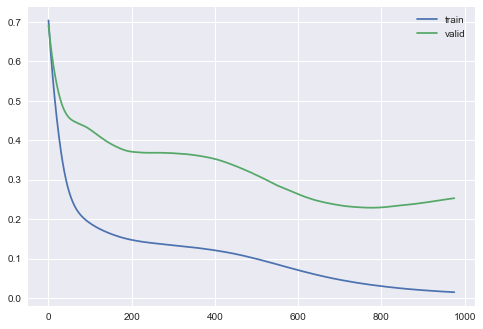

In [ ]:
# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='valid')
plt.legend()
plt.show()

---